In [1]:
# from google.colab import drive
# drive.mount('/content/drive')


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# 2023/1/14 update: google drive更改下載方式無法直接下載
%pip install gdown==4.6.0

import gdown


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# folder_path = '/content/drive/My Drive/交大學分班/112-1統計學/期末報告/資料集/'

def create_download_link(shared_link):
    file_id = shared_link.split('/')[-2]
    return f"https://drive.google.com/uc?export=download&&confirm=1&id={file_id}"

# 股票列表数据
stk_list_url = 'https://drive.google.com/file/d/1vqT8-o3uR7NWtS_nemH711elS-V8tg5w/view?usp=drive_link'
stk_list_path = create_download_link(stk_list_url)
stk_list = pd.read_csv(stk_list_path)

# 交易数据
#df_trading_url = 'https://drive.google.com/file/d/1SA112l0qsN8L_vn3SEhk0xiRaWmowoVl/view?usp=drive_link'
#df_trading_path = create_download_link(df_trading_url)
#df_trading = pd.read_csv(df_trading_path)
#print(df_trading.head())

df_trading_url = 'https://drive.google.com/uc?id=1SA112l0qsN8L_vn3SEhk0xiRaWmowoVl&confirm=t'
df_trading_output = 'all_stock_close_price_from2022-12-23to2023-12-24.csv'
gdown.download(df_trading_url, df_trading_output, quiet=False)
df_trading = pd.read_csv(df_trading_output)
print(df_trading.head())



# 券商数据
df_broker_url = 'https://drive.google.com/file/d/1nl8vMQrRCVd0I-UmT_uop07s2OIxR_K3/view?usp=drive_link'
df_broker_path = create_download_link(df_broker_url)
df_broker = pd.read_csv(df_broker_path)

df_trading
df_broker

Downloading...
From: https://drive.google.com/uc?id=1SA112l0qsN8L_vn3SEhk0xiRaWmowoVl&confirm=t
To: /Users/steven.liu/Documents/GitHub/StockBrokerPriceCorrelation/all_stock_close_price_from2022-12-23to2023-12-24.csv
100%|██████████| 437M/437M [00:14<00:00, 29.4MB/s] 


         date stock_id  Trading_Volume  Trading_money    open     max     min  \
0  2022-12-23     0050         6556232      725974713  110.70  111.05  110.40   
1  2022-12-23     0051           11515         592702   51.35   51.55   51.15   
2  2022-12-23     0052          258240       24175584   94.00   94.00   93.35   
3  2022-12-23     0053            4190         220121   52.50   52.80   52.50   
4  2022-12-23     0055           80988        1742615   21.45   21.59   21.44   

    close  spread  Trading_turnover  
0  110.70   -1.90             13445  
1   51.30   -0.45               131  
2   93.65   -1.70               508  
3   52.75   -0.85              1003  
4   21.55    0.00               184  


,securities_trader,price,buy,sell,securities_trader_id,stock_id,date
0,凱基松山,110.55,50,0,9217,0050,2022-12-23
1,凱基松山,110.65,200,0,9217,0050,2022-12-23
2,凱基松山,110.70,1009,0,9217,0050,2022-12-23
3,凱基松山,110.75,40,0,9217,0050,2022-12-23
4,凱基松山,110.80,300,0,9217,0050,2022-12-23
...,...,...,...,...,...,...,...
428608,凱基松山,36.40,13064,0,9217,9945,2023-12-22
428609,凱基松山,36.45,1000,0,9217,9945,2023-12-22
428610,凱基松山,36.50,64,0,9217,9945,2023-12-22
428611,凱基松山,175.00,0,10,9217,9958,2023-12-22


In [4]:
df_trading

,date,stock_id,Trading_Volume,Trading_money,open,max,min,close,spread,Trading_turnover
0,2022-12-23,0050,6556232,725974713,110.70,111.05,110.40,110.70,-1.90,13445
1,2022-12-23,0051,11515,592702,51.35,51.55,51.15,51.30,-0.45,131
2,2022-12-23,0052,258240,24175584,94.00,94.00,93.35,93.65,-1.70,508
3,2022-12-23,0053,4190,220121,52.50,52.80,52.50,52.75,-0.85,1003
4,2022-12-23,0055,80988,1742615,21.45,21.59,21.44,21.55,0.00,184
...,...,...,...,...,...,...,...,...,...,...
8620922,2023-12-22,ShippingTransportation,824655092,46465875533,159.99,163.08,159.05,161.88,1.89,350942
8620923,2023-12-22,TAIEX,6878372345,291856733205,17586.16,17618.17,17567.55,17596.63,52.89,2249960
8620924,2023-12-22,TPEx,649066674,63392003448,231.87,233.22,231.87,232.85,1.22,499799
8620925,2023-12-22,Textiles,22127718,1712754324,624.94,624.94,618.26,619.00,-5.94,15956


In [5]:
# 先整理股票清單（排除ETF等不列入樣本的資料)
stk_list = stk_list[~stk_list['industry_category'].isin(['ETF','ETN','上櫃指數股票型基金(ETF)','受益證券','指數投資證券(ETN)','其他','所有證券','創新板股票','存託憑證', 'Index', '大盤'])]
stk_list = stk_list[stk_list['type'].isin(['twse'])]
stk_list = stk_list[stk_list['stock_id'].apply(lambda x: len(x) == 4)]
stk_list
stock_ids = stk_list['stock_id'].unique()

# 過濾出要分析的股票 而不是ETF等等
df_broker = df_broker[df_broker['stock_id'].isin(stock_ids)]

# 按日期分組，選取每天買進量前二十的股票
# top20_buys_daily = df_broker.groupby('date').apply(lambda x: x.sort_values('buy', ascending=False).head(20)).reset_index(drop=True)

buys_daily = df_broker.groupby('date').apply(lambda x: x.sort_values('buy', ascending=False)).reset_index(drop=True)

# 計算每支股票每天的總買進量
broker_buy_sum = buys_daily.groupby(['stock_id', 'date'])['buy'].sum().reset_index()

# 合併到每日成交資料中
df_combined = pd.merge(df_trading, broker_buy_sum, on=['stock_id', 'date'], how='left')

# 計算買進比例
df_combined['buy_ratio'] = df_combined['buy'] / df_combined['Trading_Volume']


In [6]:
# 對日期進行排序，以便計算隔天價格
df_combined.sort_values(by=['stock_id', 'date'], inplace=True)
print(len(df_combined))
# ----------
df_combined['next_day_close'] = df_combined.groupby('stock_id')['close'].shift(-1)
df_combined['price_change'] = df_combined['next_day_close'] - df_combined['close']
df_combined['price_change_percentage'] = (df_combined['price_change'] / df_combined['close']) * 100

#list the next_day_price_change > +- 10%
# filter out the outlier
df_combined = df_combined[df_combined['price_change_percentage'].apply(lambda x: abs(x) < 10)]
print(len(df_combined))


df_combined['date'] = pd.to_datetime(df_combined['date'])
df_combined.sort_values(by=['stock_id', 'date'], inplace=True)
df_combined = df_combined.dropna(subset=['buy_ratio'])

print(len(df_combined))

for i in range(1, 6):
    # 先計算值
    next_day_close = df_combined.groupby('stock_id')['close'].shift(-i)
    price_change = (next_day_close - df_combined['close']) / df_combined['close'] * 100

    # 使用 .loc 来安全地修改 df_combined
    df_combined.loc[:, f'next_day_{i}_close'] = next_day_close
    df_combined.loc[:, f'price_change_day_{i}'] = price_change


df_combined = df_combined[df_combined['price_change_day_1'].abs() <= 10]
df_combined = df_combined[df_combined['price_change_day_2'].abs() <= 10 * 1.1]
df_combined = df_combined[df_combined['price_change_day_3'].abs() <= 10 * 1.1 ** 2]
df_combined = df_combined[df_combined['price_change_day_4'].abs() <= 10 * 1.1 ** 3]
df_combined = df_combined[df_combined['price_change_day_5'].abs() <= 10 * 1.1 ** 4]

# 移除NaN值
df_combined = df_combined.dropna(subset=['buy_ratio','price_change_day_1','price_change_day_2','price_change_day_3','price_change_day_4', 'price_change_day_5'])
print(len(df_combined))
df_combined

8620927
2417023
84766
72813


,date,stock_id,Trading_Volume,Trading_money,open,max,min,close,spread,Trading_turnover,...,next_day_1_close,price_change_day_1,next_day_2_close,price_change_day_2,next_day_3_close,price_change_day_3,next_day_4_close,price_change_day_4,next_day_5_close,price_change_day_5
23295,2022-12-23,1101,23483856,804299895,34.15,34.60,33.80,34.05,-0.40,10819,...,34.40,1.027900,34.30,0.734214,34.30,0.734214,33.70,-1.027900,33.65,-1.174743
54972,2022-12-26,1101,12361474,424140679,34.35,34.45,34.10,34.40,0.35,5761,...,34.30,-0.290698,34.30,-0.290698,33.70,-2.034884,33.65,-2.180233,33.50,-2.616279
86644,2022-12-27,1101,11426803,394169733,34.55,34.70,34.30,34.30,-0.10,6494,...,34.30,0.000000,33.70,-1.749271,33.65,-1.895044,33.50,-2.332362,33.50,-2.332362
118300,2022-12-28,1101,14092727,482086632,34.15,34.35,33.95,34.30,0.00,5921,...,33.70,-1.749271,33.65,-1.895044,33.50,-2.332362,33.50,-2.332362,34.45,0.437318
150025,2022-12-29,1101,13483783,456027492,34.25,34.25,33.70,33.70,-0.60,6848,...,33.65,-0.148368,33.50,-0.593472,33.50,-0.593472,34.45,2.225519,34.25,1.632047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8194781,2023-12-08,9958,5615336,1026727125,183.00,185.00,180.00,182.50,0.50,3979,...,179.00,-1.917808,181.00,-0.821918,180.00,-1.369863,186.50,2.191781,172.00,-5.753425
8237047,2023-12-11,9958,5627796,1005647950,183.00,183.50,176.00,179.00,-3.50,10760,...,181.00,1.117318,180.00,0.558659,186.50,4.189944,172.00,-3.910615,181.50,1.396648
8279448,2023-12-12,9958,4877111,887945491,179.50,184.50,179.50,181.00,2.00,3683,...,180.00,-0.552486,186.50,3.038674,172.00,-4.972376,181.50,0.276243,181.50,0.276243
8321959,2023-12-13,9958,5062733,925013081,183.00,185.50,180.00,180.00,-1.00,8060,...,186.50,3.611111,172.00,-4.444444,181.50,0.833333,181.50,0.833333,178.00,-1.111111


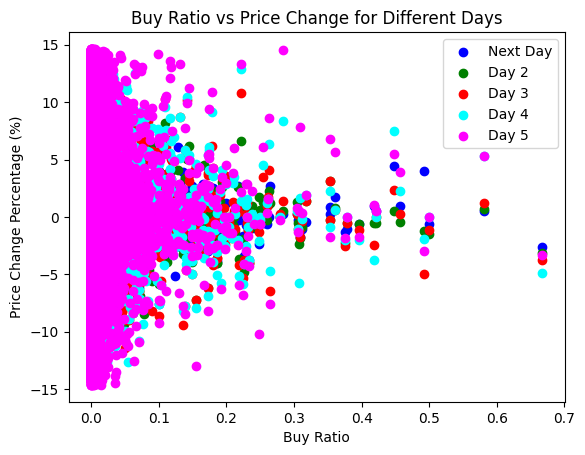

In [7]:
# 繪製散點圖
plt.scatter(df_combined['buy_ratio'], df_combined['price_change_day_1'], color='blue', label='Next Day')
plt.scatter(df_combined['buy_ratio'], df_combined['price_change_day_2'], color='green', label='Day 2')
plt.scatter(df_combined['buy_ratio'], df_combined['price_change_day_3'], color='red', label='Day 3')
plt.scatter(df_combined['buy_ratio'], df_combined['price_change_day_4'], color='cyan', label='Day 4')
plt.scatter(df_combined['buy_ratio'], df_combined['price_change_day_5'], color='magenta', label='Day 5')

# 添加標籤和標題
plt.xlabel('Buy Ratio')
plt.ylabel('Price Change Percentage (%)')
plt.title('Buy Ratio vs Price Change for Different Days')
plt.legend()

# 顯示圖形
plt.show()

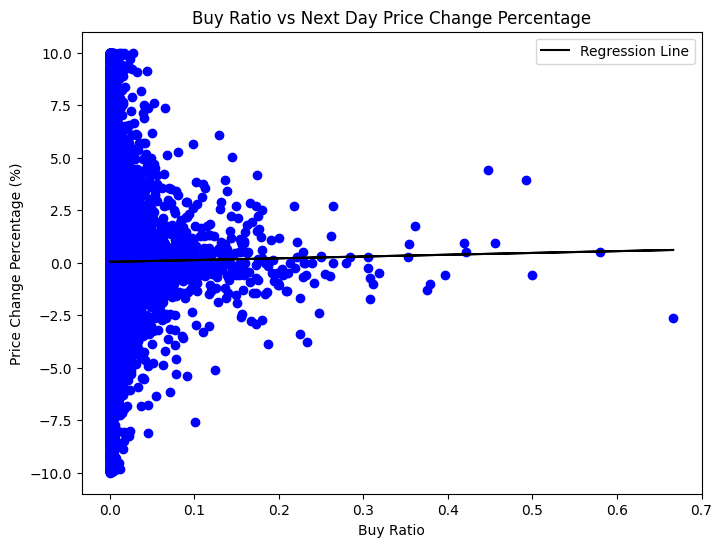

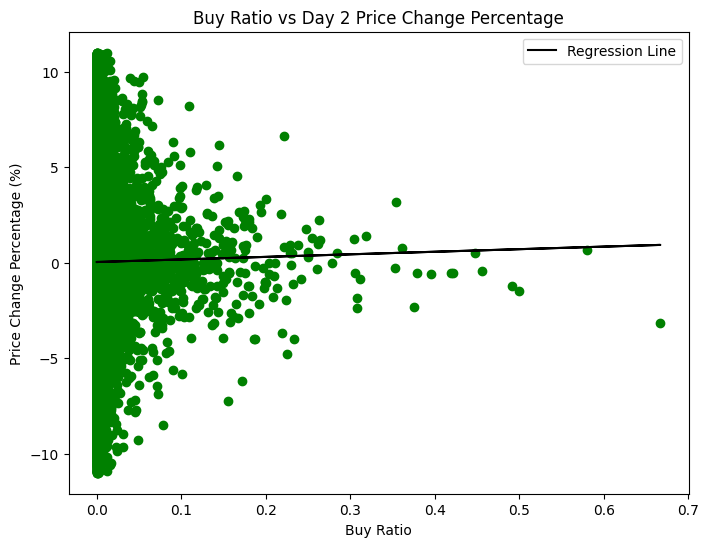

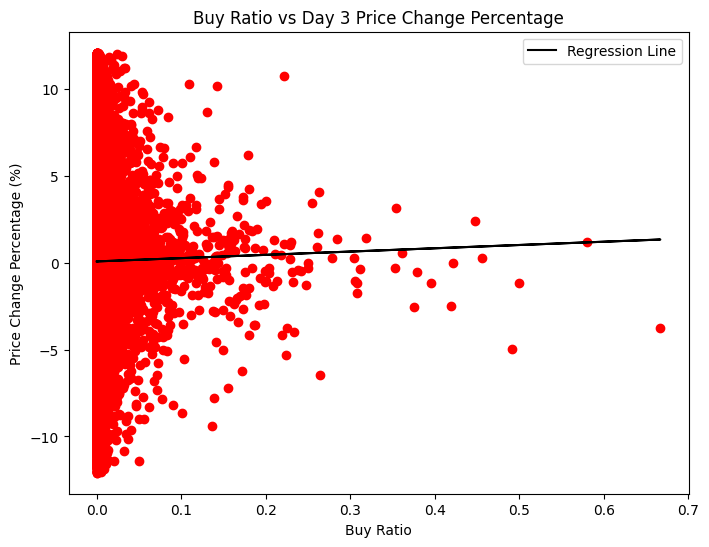

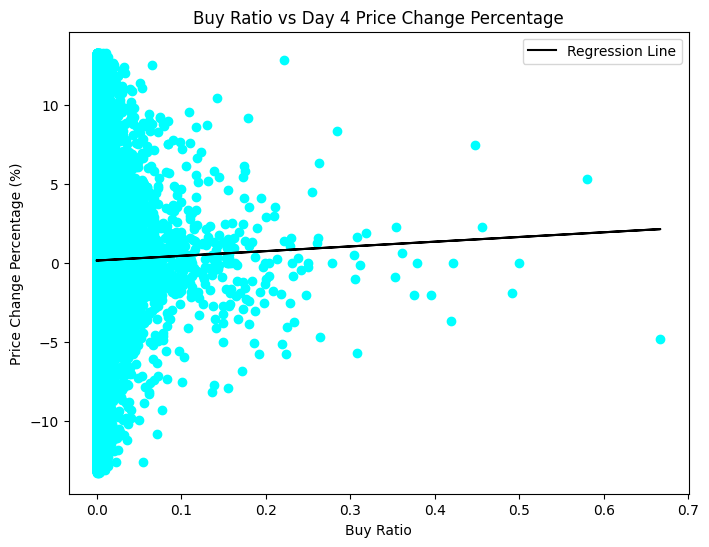

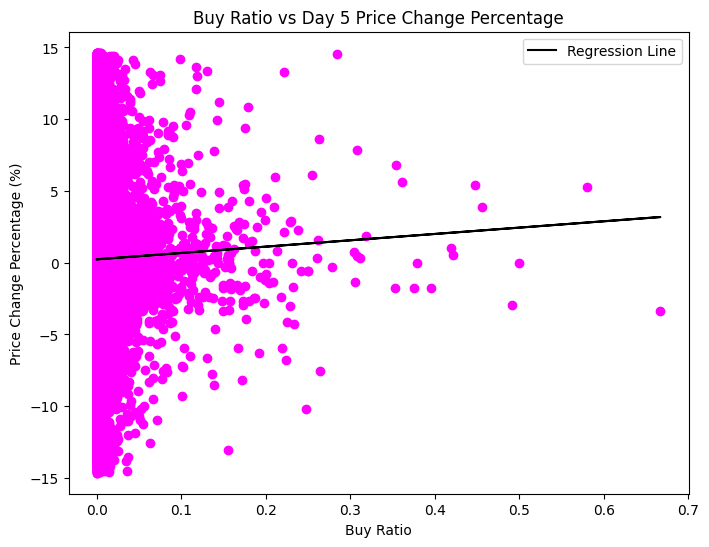

In [8]:
# 計算回歸線參數並繪製散點圖及回歸線的函數
def plot_with_regression(x, y, title, color):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color=color)

    # 計算回歸線參數
    slope, intercept = np.polyfit(x, y, 1)
    plt.plot(x, slope * x + intercept, color='black', label='Regression Line')

    plt.xlabel('Buy Ratio')
    plt.ylabel('Price Change Percentage (%)')
    plt.title(title)
    plt.legend()
    plt.show()

# 去除含有NaN值的行
df_combined.dropna(subset=['price_change_day_1', 'price_change_day_2', 'price_change_day_3', 'price_change_day_4', 'price_change_day_5'], inplace=True)

# 繪製每一天的散點圖和回歸線
plot_with_regression(df_combined['buy_ratio'], df_combined['price_change_day_1'], 'Buy Ratio vs Next Day Price Change Percentage', 'blue')
plot_with_regression(df_combined['buy_ratio'], df_combined['price_change_day_2'], 'Buy Ratio vs Day 2 Price Change Percentage', 'green')
plot_with_regression(df_combined['buy_ratio'], df_combined['price_change_day_3'], 'Buy Ratio vs Day 3 Price Change Percentage', 'red')
plot_with_regression(df_combined['buy_ratio'], df_combined['price_change_day_4'], 'Buy Ratio vs Day 4 Price Change Percentage', 'cyan')
plot_with_regression(df_combined['buy_ratio'], df_combined['price_change_day_5'], 'Buy Ratio vs Day 5 Price Change Percentage', 'magenta')

零假設（H0）是：當凱基松山這間券商買進量佔當天總成交量的2%以上時，對該股票接下來五天的平均股價沒有顯著影響

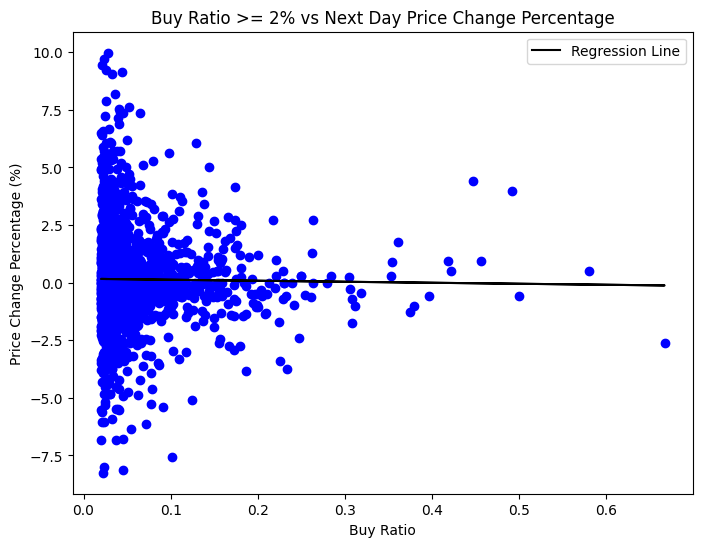

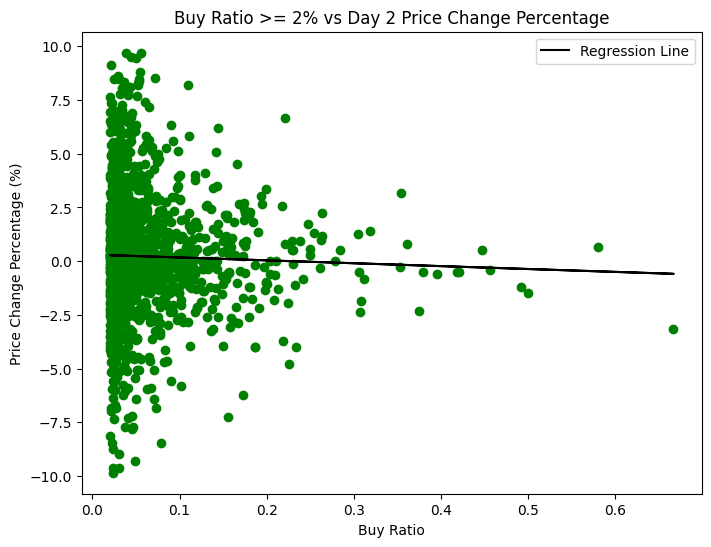

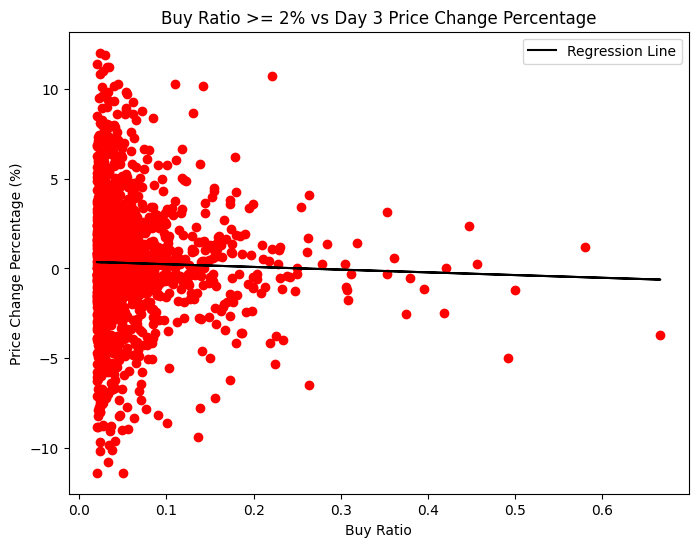

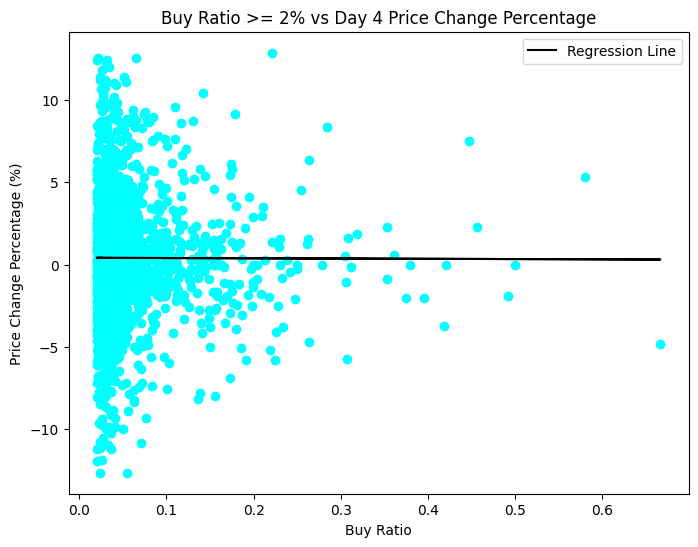

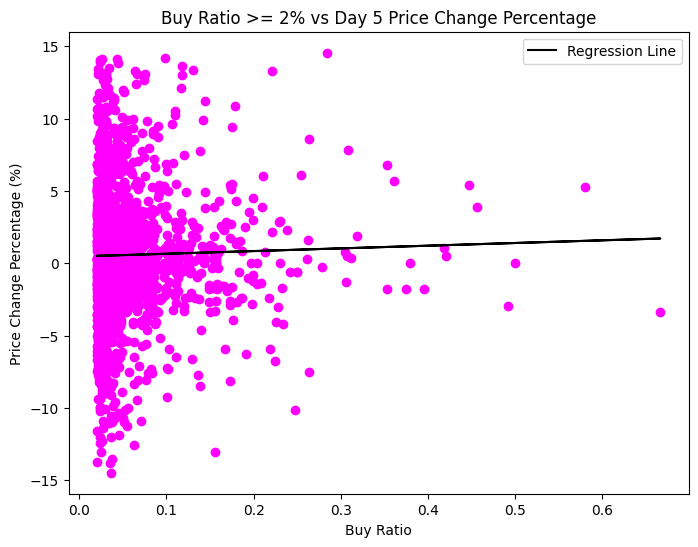

,date,stock_id,Trading_Volume,Trading_money,open,max,min,close,spread,Trading_turnover,...,price_change_day_1,next_day_2_close,price_change_day_2,next_day_3_close,price_change_day_3,next_day_4_close,price_change_day_4,next_day_5_close,price_change_day_5,avg_price_change_5d
23295,2022-12-23,1101,23483856,804299895,34.15,34.60,33.80,34.05,-0.40,10819,...,1.027900,34.30,0.734214,34.30,0.734214,33.70,-1.027900,33.65,-1.174743,0.058737
54972,2022-12-26,1101,12361474,424140679,34.35,34.45,34.10,34.40,0.35,5761,...,-0.290698,34.30,-0.290698,33.70,-2.034884,33.65,-2.180233,33.50,-2.616279,-1.482558
86644,2022-12-27,1101,11426803,394169733,34.55,34.70,34.30,34.30,-0.10,6494,...,0.000000,33.70,-1.749271,33.65,-1.895044,33.50,-2.332362,33.50,-2.332362,-1.661808
118300,2022-12-28,1101,14092727,482086632,34.15,34.35,33.95,34.30,0.00,5921,...,-1.749271,33.65,-1.895044,33.50,-2.332362,33.50,-2.332362,34.45,0.437318,-1.574344
150025,2022-12-29,1101,13483783,456027492,34.25,34.25,33.70,33.70,-0.60,6848,...,-0.148368,33.50,-0.593472,33.50,-0.593472,34.45,2.225519,34.25,1.632047,0.504451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8194781,2023-12-08,9958,5615336,1026727125,183.00,185.00,180.00,182.50,0.50,3979,...,-1.917808,181.00,-0.821918,180.00,-1.369863,186.50,2.191781,172.00,-5.753425,-1.534247
8237047,2023-12-11,9958,5627796,1005647950,183.00,183.50,176.00,179.00,-3.50,10760,...,1.117318,180.00,0.558659,186.50,4.189944,172.00,-3.910615,181.50,1.396648,0.670391
8279448,2023-12-12,9958,4877111,887945491,179.50,184.50,179.50,181.00,2.00,3683,...,-0.552486,186.50,3.038674,172.00,-4.972376,181.50,0.276243,181.50,0.276243,-0.386740
8321959,2023-12-13,9958,5062733,925013081,183.00,185.50,180.00,180.00,-1.00,8060,...,3.611111,172.00,-4.444444,181.50,0.833333,181.50,0.833333,178.00,-1.111111,-0.055556


In [9]:
df_combined['avg_price_change_5d'] = df_combined[['price_change_day_1','price_change_day_2', 'price_change_day_3', 'price_change_day_4', 'price_change_day_5']].mean(axis=1)


# 使用.loc[]來避免SettingWithCopyWarning
df_high_buy = df_combined[df_combined['buy_ratio'] >= 0.02].copy()
df_high_buy.loc[:, 'avg_price_change_5d'] = (df_high_buy[['price_change_day_1','price_change_day_2', 'price_change_day_3', 'price_change_day_4', 'price_change_day_5']].sum(axis=1)) / 5

# 繪製buy_ratio大於2%的scatter plot
plot_with_regression(df_high_buy['buy_ratio'], df_high_buy['price_change_day_1'], 'Buy Ratio >= 2% vs Next Day Price Change Percentage', 'blue')
plot_with_regression(df_high_buy['buy_ratio'], df_high_buy['price_change_day_2'], 'Buy Ratio >= 2% vs Day 2 Price Change Percentage', 'green')
plot_with_regression(df_high_buy['buy_ratio'], df_high_buy['price_change_day_3'], 'Buy Ratio >= 2% vs Day 3 Price Change Percentage', 'red')
plot_with_regression(df_high_buy['buy_ratio'], df_high_buy['price_change_day_4'], 'Buy Ratio >= 2% vs Day 4 Price Change Percentage', 'cyan')
plot_with_regression(df_high_buy['buy_ratio'], df_high_buy['price_change_day_5'], 'Buy Ratio >= 2% vs Day 5 Price Change Percentage', 'magenta')

df_combined


In [10]:
# 提取兩組數據：買進比例大於等於２% 的樣本和所有樣本
group1 = df_high_buy['avg_price_change_5d']
group2 = df_combined['avg_price_change_5d']

# 列出樣本數
group1_count = len(group1)
group2_count = len(group2)
print("買進比例大於等於 2% 的樣本數:", group1_count)
print("所有樣本數:", group2_count)

# 進行t檢定
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
print("虛無假設（H0）：當凱基松山這間券商買進量佔當天總成交量的 2% 以上時，對該股票 T0 到 T+1/T+2/T+3/T+4/T+5 的平均股價漲幅(%) 沒有顯著影響 (Beta = 0)")
print("t統計量:", t_stat)
print("p值:", p_value)

買進比例大於等於 2% 的樣本數: 1719
所有樣本數: 72813
虛無假設（H0）：當凱基松山這間券商買進量佔當天總成交量的 2% 以上時，對該股票 T0 到 T+1/T+2/T+3/T+4/T+5 的平均股價漲幅(%) 沒有顯著影響 (Beta = 0)
t統計量: 3.183073655332127
p值: 0.0014817760048993428


解讀結果
樣本數：
買進比例大於等於2%的樣本數為1719。
所有樣本的總數為72813。
t統計量：3.183073655332127

p值：0.0014817760048993428

結論
t統計量：這個值顯示兩組數據均值之間存在著一定的差異。在這種情況下，t統計量的值3.18表示有一定程度的差異。

p值：p值是觀察到的數據（或更極端情況）在零假設為真時發生的概率。這裡的p值為0.001481，這意味著如果零假設為真（即凱基松山買進量佔當天總成交量的2%以上時，對股票接下來五天的平均股價沒有顯著影響），則有0.14%的概率觀察到您的數據或更極端的結果。

由於p值（0.001481）小於一般的顯著性水平α = 0.05，拒絕H0零假設。這意味著有足夠的證據表明，當凱基松山的買進量佔當天總成交量的2%以上時，對股票接下來五天的平均股價有顯著影響

下面是根據12/27老師建議調整的
# New Approach
1. Define logBuyRatio = log(Buy Ratio) as the new explanatory variable
2. Show the scatter plot of the whole data
3. Do hypothesis of H_0: beta=0 vs H_1: beta\neq 0.
4. Try https://colab.research.google.com/drive/1HrDv6LrhkUxkAh1rVzD2n4xLaD_FcEvC?usp=sharing


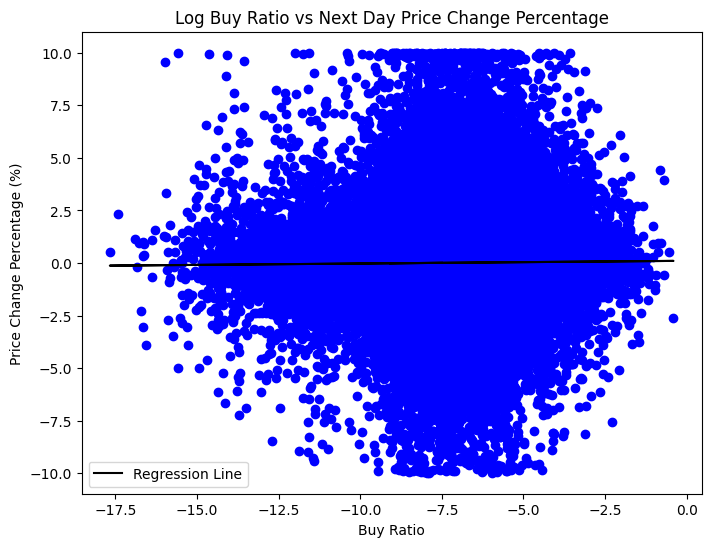

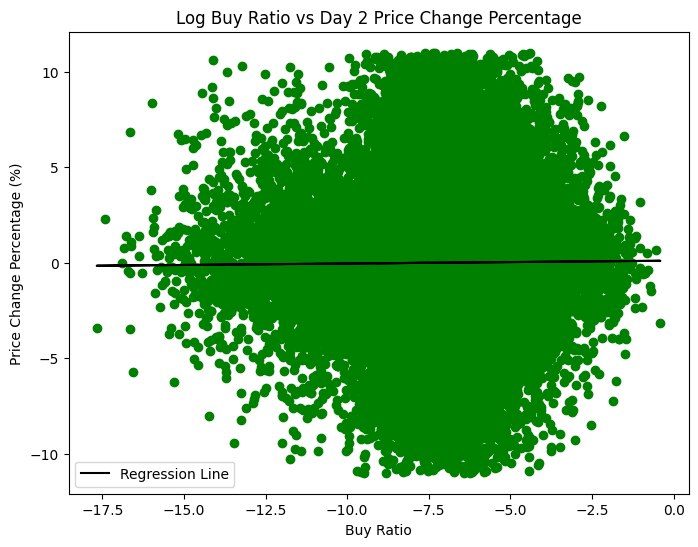

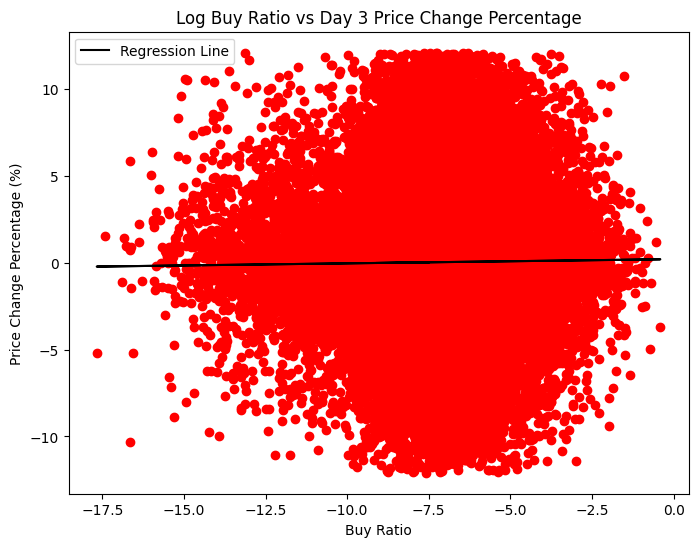

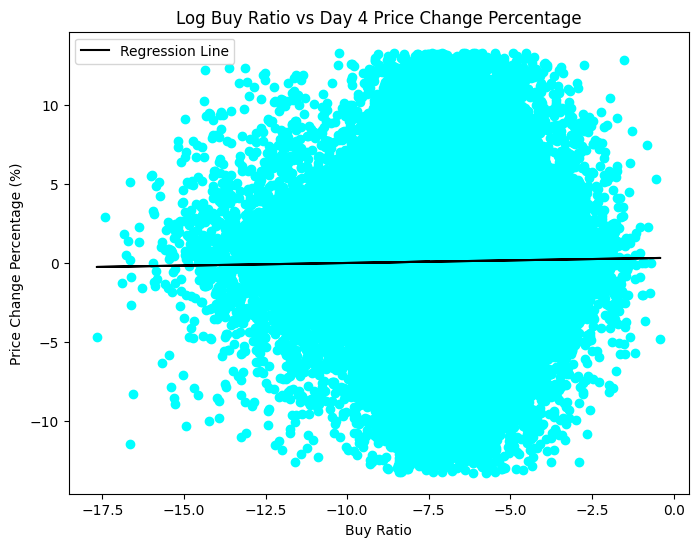

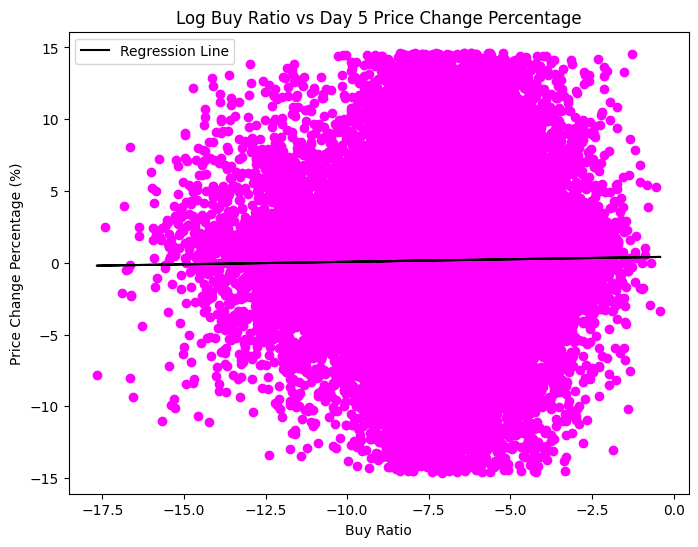

In [11]:
# 移除 Buy Ratio 為 0 的樣本
df_combined = df_combined[df_combined['buy_ratio'] > 0].copy()
# 計算 log(Buy Ratio)
df_combined['log_buy_ratio'] = np.log(df_combined['buy_ratio']+0.000000001)
# 去除含有NaN值的行
df_combined.dropna(subset=['price_change_day_1', 'price_change_day_2', 'price_change_day_3', 'price_change_day_4', 'price_change_day_5'], inplace=True)
# 繪製每一天的散點圖和回歸線
plot_with_regression(df_combined['log_buy_ratio'], df_combined['price_change_day_1'], 'Log Buy Ratio vs Next Day Price Change Percentage', 'blue')
plot_with_regression(df_combined['log_buy_ratio'], df_combined['price_change_day_2'], 'Log Buy Ratio vs Day 2 Price Change Percentage', 'green')
plot_with_regression(df_combined['log_buy_ratio'], df_combined['price_change_day_3'], 'Log Buy Ratio vs Day 3 Price Change Percentage', 'red')
plot_with_regression(df_combined['log_buy_ratio'], df_combined['price_change_day_4'], 'Log Buy Ratio vs Day 4 Price Change Percentage', 'cyan')
plot_with_regression(df_combined['log_buy_ratio'], df_combined['price_change_day_5'], 'Log Buy Ratio vs Day 5 Price Change Percentage', 'magenta')





In [12]:
#do hypothesis testing
from scipy import stats
import statsmodels.api as sm

# H0：log_buy_ratio 的回歸系數等於0，意味著 log_buy_ratio 對股價變動沒有影響。
# H1：log_buy_ratio 的回歸系數不等於0，意味著 log_buy_ratio 對股價變動有影響。

# Prepare x a and y for regression analysis
X = df_combined['log_buy_ratio']
Y = df_combined['avg_price_change_5d']

# Add constant to predictor variable
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(Y, X)
results = model.fit()

# Print regression parameters
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     avg_price_change_5d   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                  0.000
Method:                  Least Squares   F-statistic:                     10.41
Date:                 Tue, 16 Jan 2024   Prob (F-statistic):            0.00125
Time:                         23:59:34   Log-Likelihood:            -1.4215e+05
No. Observations:                55472   AIC:                         2.843e+05
Df Residuals:                    55470   BIC:                         2.843e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2298      0.055 

檢視結果

回歸結果解讀
R-squared (R²)：0.000。這表明模型解釋的變異量非常小，log_buy_ratio 對 avg_price_change_5d 的解釋能力有限。

系數 (coef) for log_buy_ratio：0.0241。這意味著 log_buy_ratio 每增加一個單位，avg_price_change_5d 平均增加 0.0241 個百分點。

p 值 for log_buy_ratio：0.001。這個 p 值遠小於通常的顯著性水平（例如 0.05 或 0.01），這意味著我們可以拒絕零假設，認為 log_buy_ratio 對股價變動有顯著影響。

結論
線性回歸結果，有足夠的證據表明 log_buy_ratio 對股票接下來五天的平均股價變動有顯著影響。盡管影響的大小（系數）不大，但統計上是顯著的。

注意事項
模型解釋能力：雖然模型統計上顯著，但 R² 值非常低，說明 log_buy_ratio 變量對股價變動的解釋能力有限。可能還有其他未考慮的因素影響股價變動。




[github link](https://github.com/tw-lws/StockBrokerPriceCorrelation)

Restriction :
10 mins presentation
10 slides

1. Motivation

2. Data Visualization
3. 模型寫出來 (Model, H0) Formulation
4. 假設檢定六步驟
5. 結論

----


